# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Prerequisites

Before starting this project, you should have some basic knowledge of Python programming and Pandas. In addition, you may want to use the following packages in your Python environment:

- pandas
- numpy
- seaborn
- matplotlib

These packages should already be installed in Coursera's Jupyter Notebook environment, however if you'd like to install additional packages that are not included in this environment or are working off platform you can install additional packages using `!pip install packagename` within a notebook cell such as:

- `!pip install pandas`
- `!pip install matplotlib`

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

## Task 1: Load the Data

In [6]:
# your code here

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_excel("Online Retail.xlsx")

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
#Create different colums and split the InvoiceDate into Year, Month and Day
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day_name()

In [6]:
#display the first 5 rows
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,Wednesday


In [7]:
#Drop irrelevant columns
df = df.drop(['InvoiceNo', 'StockCode'], axis=1)

In [8]:
df.shape

(541909, 9)

In [9]:
#Identify the number of duplicates existing in the data
df_duplicates = df.duplicated()
df_duplicates.sum()

6007

In [10]:
#Drop the duplicates
df = df.drop_duplicates()

In [11]:
df.shape

(535902, 9)

In [12]:
#Identify columns with rows which have null values
df.isnull().sum()

Description      1370
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     134374
Country             0
Year                0
Month               0
Day                 0
dtype: int64

In [13]:
#Drop the rows with null values
df = df.dropna()

In [14]:
df.shape

(401528, 9)

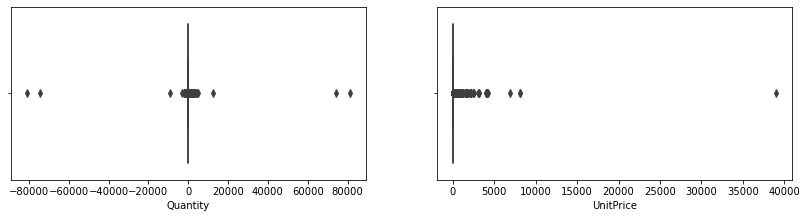

In [15]:
#Determine the existence of outliers in our data with focus on UnitPrice and Quantity
plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
sns.boxplot(df['Quantity'])
plt.subplot(2,2,2)
sns.boxplot(df['UnitPrice'])
plt.show()

In [16]:
#As identified in the diagram above, there are outliers in both columns, we initiate the process of removing the outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
IQR

Quantity        10.0
UnitPrice        2.5
CustomerID    2849.0
Year             0.0
Month            6.0
dtype: float64

In [17]:
ul = Q3+1.5*IQR
ll = Q1-1.5*IQR
ll

Quantity       -13.0
UnitPrice       -2.5
CustomerID    9665.5
Year          2011.0
Month           -4.0
dtype: float64

In [18]:
ul

Quantity         27.0
UnitPrice         7.5
CustomerID    21061.5
Year           2011.0
Month            20.0
dtype: float64

In [19]:
df.dtypes

Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
Year                    int64
Month                   int64
Day                    object
dtype: object

In [20]:
#Eliminate outliers in Quantity
df = df[(df['Quantity'] < 27.0) & (df['Quantity'] > 0)]
df.shape

(366989, 9)

In [21]:
#Eliminate outliers in UnitPrice
df = df[(df['UnitPrice'] < 7.5) & (df['UnitPrice'] > 0)]
df.shape

(332549, 9)

In [22]:
df.describe()

,Quantity,UnitPrice,CustomerID,Year,Month
count,332549.000000,332549.000000,332549.000000,332549.000000,332549.000000
mean,7.556844,2.185227,15319.140097,2010.934849,7.654935
std,6.775743,1.531582,1711.262896,0.246793,3.409585
min,1.000000,0.001000,12347.000000,2010.000000,1.000000
25%,2.000000,1.250000,13988.000000,2011.000000,5.000000
50%,6.000000,1.650000,15235.000000,2011.000000,9.000000
75%,12.000000,2.950000,16814.000000,2011.000000,11.000000
max,26.000000,7.460000,18287.000000,2011.000000,12.000000


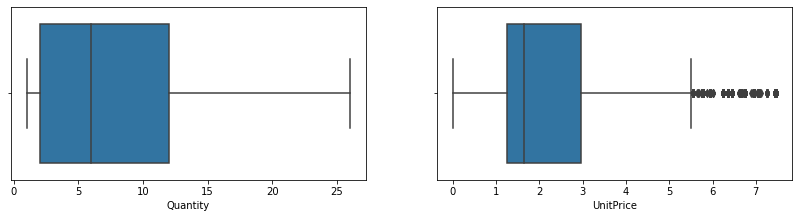

In [23]:
#Plot new boxplots to determine whether the outliers still exist
plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
sns.boxplot(df['Quantity'])
plt.subplot(2,2,2)
sns.boxplot(df['UnitPrice'])
plt.show()

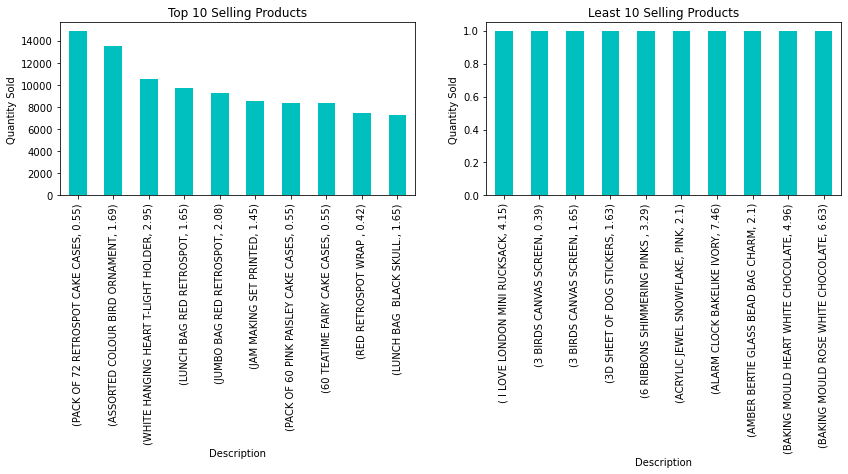

In [24]:
plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
top_products = df.groupby(['Description', 'UnitPrice'])['Quantity'].sum().nlargest(10)
top_products.plot(kind = 'bar', color='c')
plt.title('Top 10 Selling Products')
plt.xlabel('Description')
plt.ylabel('Quantity Sold')
plt.subplot(2,2,2)
least_products = df.groupby(['Description', 'UnitPrice'])['Quantity'].sum().nsmallest(10)
least_products.plot(kind = 'bar', color='c')
plt.title('Least 10 Selling Products')
plt.xlabel('Description')
plt.ylabel('Quantity Sold')
plt.show()

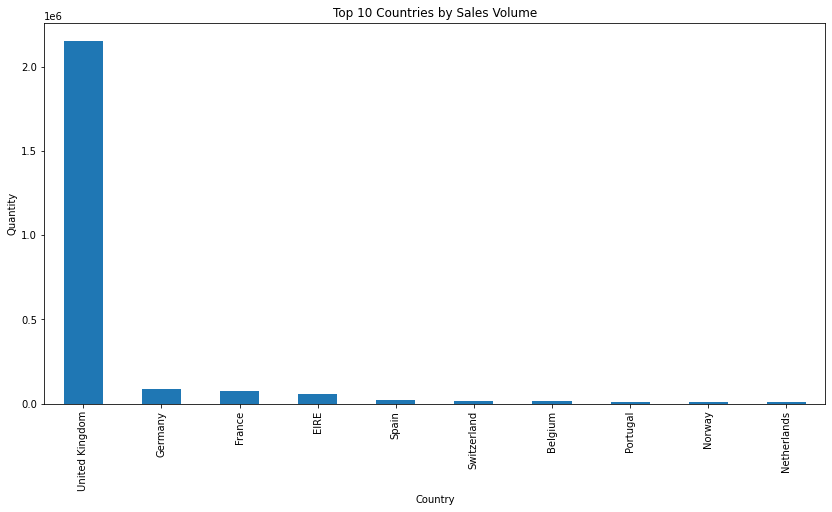

In [25]:
plt.figure(figsize=(14,7))
top_countries = df.groupby('Country')['Quantity'].sum().nlargest(10)
top_countries.plot(kind = 'bar')
plt.title('Top 10 Countries by Sales Volume')
plt.xlabel('Country')
plt.ylabel('Quantity')
plt.show()

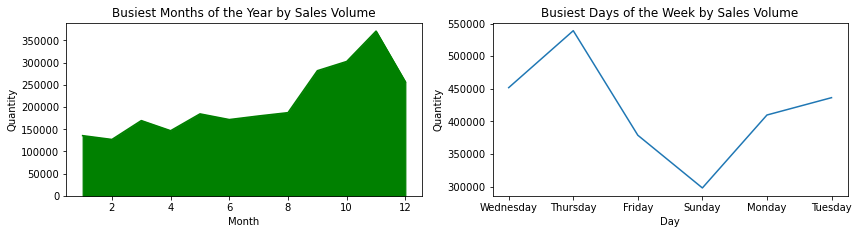

In [26]:
plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
Monthly_Sales = df.groupby(['Month'])['Quantity'].sum()
Monthly_Sales.plot(kind = 'area', color='g')
plt.title('Busiest Months of the Year by Sales Volume')
plt.xlabel('Month')
plt.ylabel('Quantity')

plt.subplot(2,2,2)
top_days = df.groupby(df['Day'],sort=False)['Quantity'].sum()
top_days.plot(kind = 'line')
plt.title('Busiest Days of the Week by Sales Volume')
plt.xlabel('Day')
plt.ylabel('Quantity')
plt.show()

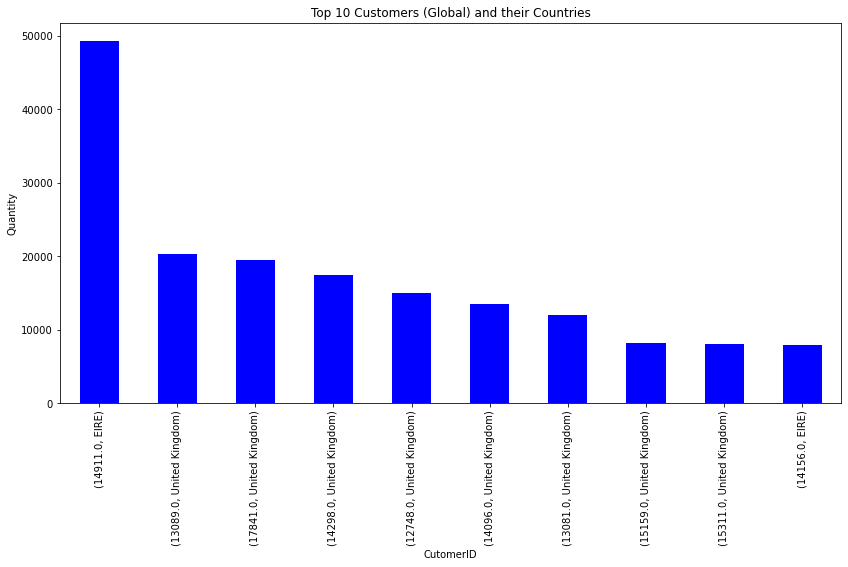

In [27]:
plt.figure(figsize=(14,7))
top_customers = df.groupby(['CustomerID','Country'])['Quantity'].sum().nlargest(10)
top_customers.plot(kind = 'bar', color = 'b')
plt.title('Top 10 Customers (Global) and their Countries')
plt.xlabel('CutomerID')
plt.ylabel('Quantity')
plt.show()

In [28]:
#Summary of Findings
df.corr()

,Quantity,UnitPrice,CustomerID,Year,Month
Quantity,1.000000,-0.349524,-0.146732,0.024932,-0.042613
UnitPrice,-0.349524,1.000000,-0.007764,-0.029616,-0.003912
CustomerID,-0.146732,-0.007764,1.000000,-0.037282,0.027637
Year,0.024932,-0.029616,-0.037282,1.000000,-0.336423
Month,-0.042613,-0.003912,0.027637,-0.336423,1.000000


In [ ]:
#Summary of Findings
#1. Though weak, there is a negative correlation between the price per unit and quantity sold of each type of product. Those with lower prices sold higher volumes than those with lower volumes, with the exception of a couple of products.
#2. United Kingdom is clearly the biggest market for the company's products as 20 times more quantities were sold in the UK than the closest country in the second place (Germany)
#3. The company's single biggest customer with ID: 14911.0 is from EIRE (Ireland) as it does more than 2 times the volume of the 2nd placed customer who comes from United Kingdom
#4. There are 8 UK customers represented in the global top 10 customers,confirming the UK as the biggest market for the company's products
#5. The busiest month of the year for the company sales is November while the busiest day of the week is Thursday

#Conclusions
#1. In the short run, more marketing budget should be created for the rest of the countries in the top 10 where there is a marked interest in the company's prokducts to rev up the sales volume
#2. A loyalty promo should be created to encourage consistency and improved patronage from the customers
#3. Special marketing intervention like product bundling should be created to promote least-selling products